# Feature Engineering

**1.load the data**

In [1]:
import pandas as pd
import numpy as np
df = pd.read_parquet("../data/curated/preprocessed_df.parquet")
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,1,23.5,0.5,3.00,0.0
...,...,...,...,...,...,...,...,...,...
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0
8953428,2022-03-31 23:31:48,2022-03-31 23:53:27,6.69,229,1,22.0,0.5,5.16,0.0


**2.Feature engineering**

In [2]:
# time of the day and day of week could be a useful feature for analysing
df['time_of_day'] = df['tpep_pickup_datetime'].dt.hour
df['day_of_week'] = df['tpep_pickup_datetime'].dt.weekday+1
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee,time_of_day,day_of_week
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0,0,6
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0,0,6
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0,0,6
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0,0,6
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,1,23.5,0.5,3.00,0.0,0,6
...,...,...,...,...,...,...,...,...,...,...,...
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0,23,4
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0,23,4
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0,23,4
8953428,2022-03-31 23:31:48,2022-03-31 23:53:27,6.69,229,1,22.0,0.5,5.16,0.0,23,4


In [3]:
# get the duration for the trip for future use
df['duration(min)'] = (df['tpep_dropoff_datetime']-df['tpep_pickup_datetime']).astype('timedelta64[s]')/60
df['duration(min)'] = df['duration(min)'].round(3)
df


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,airport_fee,time_of_day,day_of_week,duration(min)
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,0.0,0,6,17.817
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,0.0,0,6,8.400
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,0.0,0,6,8.967
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,0.0,0,6,10.033
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,1,23.5,0.5,3.00,0.0,0,6,37.533
...,...,...,...,...,...,...,...,...,...,...,...,...
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,0.0,23,4,22.200
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,0.0,23,4,9.233
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,0.0,23,4,16.400
8953428,2022-03-31 23:31:48,2022-03-31 23:53:27,6.69,229,1,22.0,0.5,5.16,0.0,23,4,21.650


In [4]:
df['duration(min)'].describe()

count    8.183276e+06
mean     1.419646e+01
std      4.584766e+01
min      1.700000e-02
25%      6.750000e+00
50%      1.070000e+01
75%      1.650000e+01
max      8.037700e+03
Name: duration(min), dtype: float64

In [5]:
# as the google map, the time travel from one side of nyc to the farest side takes about 50 miniutes
# there for the duration >200 would be fair enough to drop
df = df[df['duration(min)'] < 200]
df.shape

(8174266, 12)

In [6]:
# Now I wanna predict the tips for cash paying by using the data from credit card
# firstly sum the other columns to get a total amout excluding the tip
# note that it is not seriously total payment because I drop some other payments
df.insert(8, "total_payment",value = df[['fare_amount','extra','airport_fee']].sum(axis=1))
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,total_payment,airport_fee,time_of_day,day_of_week,duration(min)
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.65,17.5,0.0,0,6,17.817
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.00,8.5,0.0,0,6,8.400
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.76,8.0,0.0,0,6,8.967
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,0.00,8.5,0.0,0,6,10.033
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,1,23.5,0.5,3.00,24.0,0.0,0,6,37.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,0.00,21.0,0.0,23,4,22.200
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.00,9.5,0.0,23,4,9.233
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.66,15.0,0.0,23,4,16.400
8953428,2022-03-31 23:31:48,2022-03-31 23:53:27,6.69,229,1,22.0,0.5,5.16,22.5,0.0,23,4,21.650


In [7]:
# next we want the mean ratio of tip amout and total payment
sub_df = df.loc[df['payment_type'] == 1,['tip_amount','total_payment']]
sub_df['tip_ratio'] = sub_df['tip_amount']/sub_df['total_payment']
mean_tip_ratio = sub_df['tip_ratio'].mean()

# apply the mean ratio to the cash payment
df.loc[df['payment_type'] == 2,'tip_amount'] = df['total_payment'] * mean_tip_ratio
df

,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,payment_type,fare_amount,extra,tip_amount,total_payment,airport_fee,time_of_day,day_of_week,duration(min)
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,1,14.5,3.0,3.650000,17.5,0.0,0,6,17.817
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,1,8.0,0.5,4.000000,8.5,0.0,0,6,8.400
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,1,7.5,0.5,1.760000,8.0,0.0,0,6,8.967
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,2,8.0,0.5,2.040397,8.5,0.0,0,6,10.033
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,1,23.5,0.5,3.000000,24.0,0.0,0,6,37.533
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8953425,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,2,18.0,3.0,5.040981,21.0,0.0,23,4,22.200
8953426,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,1,9.0,0.5,0.000000,9.5,0.0,23,4,9.233
8953427,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,1,14.5,0.5,3.660000,15.0,0.0,23,4,16.400
8953428,2022-03-31 23:31:48,2022-03-31 23:53:27,6.69,229,1,22.0,0.5,5.160000,22.5,0.0,23,4,21.650


In [8]:
# now we can update the payment with the tips
df['total_payment'] = df['total_payment'] + df['tip_amount']
# and then we can drop all the other feature about the payment
df = df.iloc[:,[0,1,2,3,8,10,11,12]]
df.head()

/tmp/ipykernel_3178/2438599770.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['total_payment'] = df['total_payment'] + df['tip_amount']


,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,total_payment,time_of_day,day_of_week,duration(min)
0,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,21.150000,0,6,17.817
1,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,12.500000,0,6,8.400
2,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,9.760000,0,6,8.967
3,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,10.540397,0,6,10.033
4,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,27.000000,0,6,37.533


In [9]:
# I want use earning efficiency (payment/time) for a single tip to represent the
# efficiency of earning for each tip (sounds like rubbish, but hope u understand)
df.insert(0,"earning_efficiency",df['total_payment'] / df['duration(min)'])
df

,earning_efficiency,tpep_pickup_datetime,tpep_dropoff_datetime,trip_distance,PULocationID,total_payment,time_of_day,day_of_week,duration(min)
0,1.187069,2022-01-01 00:35:40,2022-01-01 00:53:29,3.80,142,21.150000,0,6,17.817
1,1.488095,2022-01-01 00:33:43,2022-01-01 00:42:07,2.10,236,12.500000,0,6,8.400
2,1.088435,2022-01-01 00:53:21,2022-01-01 01:02:19,0.97,166,9.760000,0,6,8.967
3,1.050573,2022-01-01 00:25:21,2022-01-01 00:35:23,1.09,114,10.540397,0,6,10.033
4,0.719367,2022-01-01 00:36:48,2022-01-01 01:14:20,4.30,68,27.000000,0,6,37.533
...,...,...,...,...,...,...,...,...,...
8953425,1.173017,2022-03-31 23:06:29,2022-03-31 23:28:41,4.60,113,26.040981,23,4,22.200
8953426,1.028918,2022-03-31 23:33:04,2022-03-31 23:42:18,1.90,238,9.500000,23,4,9.233
8953427,1.137805,2022-03-31 23:03:08,2022-03-31 23:19:32,3.96,148,18.660000,23,4,16.400
8953428,1.277598,2022-03-31 23:31:48,2022-03-31 23:53:27,6.69,229,27.660000,23,4,21.650


In [10]:
df['earning_efficiency'].describe()

count    8.174266e+06
mean     1.654585e+00
std      1.357393e+01
min      2.632058e-02
25%      1.036697e+00
50%      1.230508e+00
75%      1.523172e+00
max      3.938972e+03
Name: earning_efficiency, dtype: float64

Text(0, 0.5, 'earning_efficiency')

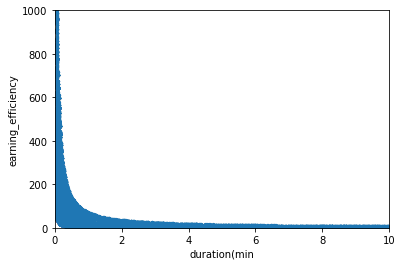

In [11]:
# The mean is about 1.68, but the max goes upto 1412.
# It is pretty clear that the extremly high earning rate is caused by
# the pretty small duration of a trip, let's take a close look
import matplotlib.pyplot as plt
plt.scatter(df['duration(min)'],df['earning_efficiency'],s=5)
plt.axis([0,10,0,1000])
plt.xlabel('duration(min')
plt.ylabel('earning_efficiency')

It seems need to take a log transformation, I will do this later in this notebook

**3.external dataset**


I decide to add the dataset of snowfall for each day for New York
data is from

http://www.cnyweather.com/wxsnowdetail.php?year=2022

there is no download link, so I grab the data and transformed it to csv file, just put it in the data/raw file

I've add it into the folder data, in case if you need

In [12]:
# read data
snow = pd.read_csv("../data/raw/SnowFall2021-22.csv")
snow.head()

,Day,Jul,Aug,Sep,Oct,Nov,Dec,Jan,Feb,Mar,Apr,May,Jun
0,1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.1,0.0,0.0,0.0
2,3,0.0,0.0,0.0,0.0,0.0,0.0,0.8,0.0,3.2,0.0,0.0,0.0
3,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.2,0.0,0.7,0.0,0.0
4,5,0.0,0.0,0.0,0.0,0.0,0.2,0.0,2.6,0.0,0.0,0.0,0.0


In [13]:
# get the wantted months in to the form we can merge
snow_jan = snow.iloc[:,[0,7]]
snow_feb = snow.iloc[:,[0,8]]
snow_mar = snow.iloc[:,[0,9]]

# feb only have 28 days for 2022
snow_feb = snow_feb.iloc[0:28,:]

# I want day and moth to be the merge key
snow_jan.insert(1, "Month",value = 1)
snow_feb.insert(1, "Month",value = 2)
snow_mar.insert(1, "Month",value = 3)

# rename the columns to concat
snow_jan.columns = ['Day','Month','snow_fall']
snow_feb.columns = ['Day','Month','snow_fall']
snow_mar.columns = ['Day','Month','snow_fall']

snow = pd.concat([snow_jan,snow_feb,snow_mar], axis = 0)
snow['snow_fall'] = snow['snow_fall'].astype(float)
snow

,Day,Month,snow_fall
0,1,1,0.0
1,2,1,0.0
2,3,1,0.8
3,4,1,0.0
4,5,1,0.0
...,...,...,...
26,27,3,0.4
27,28,3,1.0
28,29,3,0.2
29,30,3,0.0


In [14]:
# as a numerical number, the snow fall is clearly does not follow a normal distribution
# I decide to transfer it into categorical value with yes or no
snow.insert(2,"snow",'yes')
snow

,Day,Month,snow,snow_fall
0,1,1,yes,0.0
1,2,1,yes,0.0
2,3,1,yes,0.8
3,4,1,yes,0.0
4,5,1,yes,0.0
...,...,...,...,...
26,27,3,yes,0.4
27,28,3,yes,1.0
28,29,3,yes,0.2
29,30,3,yes,0.0


In [15]:
for i in range(90):
    if snow.iloc[i,3] == 0.0:
        snow.iloc[i,2] = 'no'
snow.drop(columns='snow_fall', inplace = True)
snow

,Day,Month,snow
0,1,1,no
1,2,1,no
2,3,1,yes
3,4,1,no
4,5,1,no
...,...,...,...
26,27,3,yes
27,28,3,yes
28,29,3,yes
29,30,3,no


In [16]:
# we need our merge key for df too
df.insert(3, "Day",value = df['tpep_pickup_datetime'].dt.day)
df.insert(3, "Month",value = df['tpep_pickup_datetime'].dt.month)
df.head()

,earning_efficiency,tpep_pickup_datetime,tpep_dropoff_datetime,Month,Day,trip_distance,PULocationID,total_payment,time_of_day,day_of_week,duration(min)
0,1.187069,2022-01-01 00:35:40,2022-01-01 00:53:29,1,1,3.80,142,21.150000,0,6,17.817
1,1.488095,2022-01-01 00:33:43,2022-01-01 00:42:07,1,1,2.10,236,12.500000,0,6,8.400
2,1.088435,2022-01-01 00:53:21,2022-01-01 01:02:19,1,1,0.97,166,9.760000,0,6,8.967
3,1.050573,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1,1.09,114,10.540397,0,6,10.033
4,0.719367,2022-01-01 00:36:48,2022-01-01 01:14:20,1,1,4.30,68,27.000000,0,6,37.533


In [17]:
# merge
df = pd.merge(df,snow, how='left',on=['Day','Month'])
df

,earning_efficiency,tpep_pickup_datetime,tpep_dropoff_datetime,Month,Day,trip_distance,PULocationID,total_payment,time_of_day,day_of_week,duration(min),snow
0,1.187069,2022-01-01 00:35:40,2022-01-01 00:53:29,1,1,3.80,142,21.150000,0,6,17.817,no
1,1.488095,2022-01-01 00:33:43,2022-01-01 00:42:07,1,1,2.10,236,12.500000,0,6,8.400,no
2,1.088435,2022-01-01 00:53:21,2022-01-01 01:02:19,1,1,0.97,166,9.760000,0,6,8.967,no
3,1.050573,2022-01-01 00:25:21,2022-01-01 00:35:23,1,1,1.09,114,10.540397,0,6,10.033,no
4,0.719367,2022-01-01 00:36:48,2022-01-01 01:14:20,1,1,4.30,68,27.000000,0,6,37.533,no
...,...,...,...,...,...,...,...,...,...,...,...,...
8174261,1.173017,2022-03-31 23:06:29,2022-03-31 23:28:41,3,31,4.60,113,26.040981,23,4,22.200,no
8174262,1.028918,2022-03-31 23:33:04,2022-03-31 23:42:18,3,31,1.90,238,9.500000,23,4,9.233,no
8174263,1.137805,2022-03-31 23:03:08,2022-03-31 23:19:32,3,31,3.96,148,18.660000,23,4,16.400,no
8174264,1.277598,2022-03-31 23:31:48,2022-03-31 23:53:27,3,31,6.69,229,27.660000,23,4,21.650,no


In [18]:
# We've got all the feature we want, now we can drop the unneeded feature and save
df = df.iloc[:,[0,5,6,8,9,10,11]]
df

,earning_efficiency,trip_distance,PULocationID,time_of_day,day_of_week,duration(min),snow
0,1.187069,3.80,142,0,6,17.817,no
1,1.488095,2.10,236,0,6,8.400,no
2,1.088435,0.97,166,0,6,8.967,no
3,1.050573,1.09,114,0,6,10.033,no
4,0.719367,4.30,68,0,6,37.533,no
...,...,...,...,...,...,...,...
8174261,1.173017,4.60,113,23,4,22.200,no
8174262,1.028918,1.90,238,23,4,9.233,no
8174263,1.137805,3.96,148,23,4,16.400,no
8174264,1.277598,6.69,229,23,4,21.650,no


**Normalising the data**

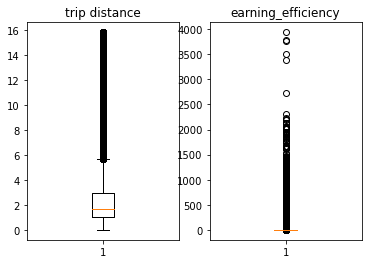

In [19]:
# plot the numeric variables to see their distribution
# I didn't app the airpot fee cause the min of it is 0, max is 1.25
plt.subplot(1,2,1)
plt.boxplot(df['trip_distance'])
plt.title("trip distance")
plt.subplot(1,2,2)
plt.boxplot(df['earning_efficiency'])
plt.title("earning_efficiency")
plt.show()

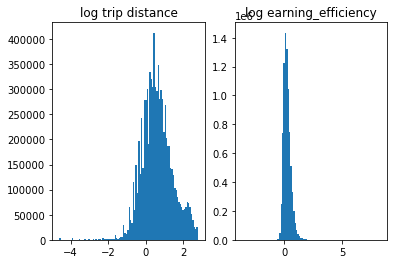

In [20]:
# it is clear that all these variables are heavly left skewed
# try to perform a log transformation
df.insert(1,"log_trip_distance", value = np.log(df['trip_distance']))
df.insert(0,"log_earning_efficiency", value = np.log(df['earning_efficiency']))
plt.subplot(1,2,1)
plt.hist(df['log_trip_distance'],bins = 100)
plt.title("log trip distance")
plt.subplot(1,2,2)
plt.hist(df['log_earning_efficiency'], bins = 100)
plt.title("log earning_efficiency")
plt.show()

In [21]:
# it seems to have some outlier even for log earning efficiency
# use 3 σ to drop the outlier
from statistics import mean


std = df['log_earning_efficiency'].std()
mean = df['log_earning_efficiency'].mean()
df = df[(df['log_earning_efficiency'] >= (mean - 3 * std))&(df['log_earning_efficiency'] <= (mean + 3 * std))]
df.shape

(8106559, 9)

In [22]:
# save the data
df.to_parquet("../data/curated/result_df.parquet")